In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
fashion_test_df.shape

(10000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
training = np.array(fashion_train_df, dtype = 'float32')

In [8]:
testing = np.array(fashion_test_df, dtype = 'float32')

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

0.0


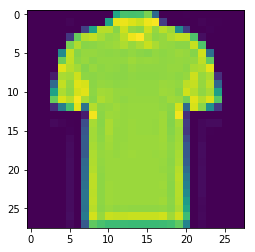

In [10]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
print(label)

60000


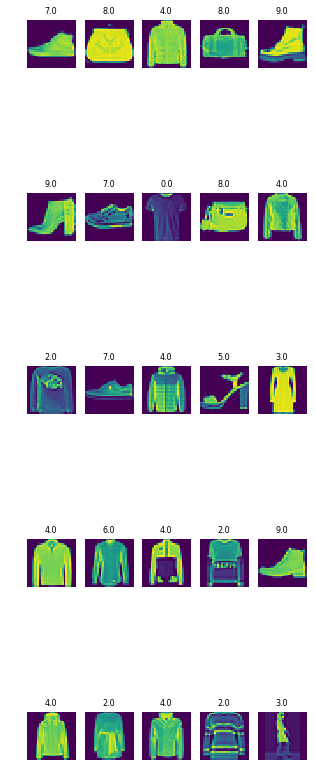

In [11]:
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(l_grid, w_grid , figsize = (5, 15))
axes = axes.ravel()
ln_training = len(training)
print(ln_training)

for i in np.arange(0, l_grid * w_grid ):
    index = np.random.randint(0, ln_training )
    axes[i].imshow( training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
    plt.subplots_adjust(hspace=0.4)

In [16]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [17]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_validate , y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345) 

In [20]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], * (28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [94]:
x_train.shape

(48000, 28, 28, 1)

In [95]:
x_test.shape

(10000, 28, 28, 1)

In [96]:
x_validate.shape

(12000, 28, 28, 1)

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [98]:
cnn_model = Sequential()

In [99]:
#to increase accuracy we can increase the number of kernls  thas is 32
cnn_model.add(Conv2D(128, 3, 3, input_shape = (28,28,1), activation = 'relu' ))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [101]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [102]:
cnn_model.add(Flatten())

In [103]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [104]:
 cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [105]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics =['accuracy'])

In [106]:
epoches = 50

In [107]:
cnn_model.fit(x_train,
              y_train,
             batch_size = 512,
             nb_epoch = epoches, 
             verbose = 1,
             validation_data = (x_validate, y_validate))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 233s 5ms/step - loss: 1.0206 - acc: 0.6690 - val_loss: 0.5645 - val_acc: 0.7863
Epoch 2/50
48000/48000 [==============================] - 250s 5ms/step - loss: 0.5247 - acc: 0.8071 - val_loss: 0.4807 - val_acc: 0.8310
Epoch 3/50
48000/48000 [==============================] - 321s 7ms/step - loss: 0.4544 - acc: 0.8385 - val_loss: 0.4276 - val_acc: 0.8468
Epoch 4/50
48000/48000 [==============================] - 289s 6ms/step - loss: 0.4137 - acc: 0.8549 - val_loss: 0.4026 - val_acc: 0.8612
Epoch 5/50
48000/48000 [==============================] - 332s 7ms/step - loss: 0.3966 - acc: 0.8585 - val_loss: 0.3893 - val_acc: 0.8637
Epoch 6/50
48000/48000 [==============================] - 413s 9ms/step - loss: 0.3763 - acc: 0.8668 - val_loss: 0.3769 - val_acc: 0.8666
Epoch 7/50
48000/48000 [==============================] - 343s 7ms/step - loss: 0.3558 - acc: 0.8749 - val_loss: 0.3566 - 

In [108]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('test accuracy is: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 37s 4ms/step
test accuracy is: 0.911


In [109]:
predicted_classes = cnn_model.predict_classes(x_test)

In [110]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

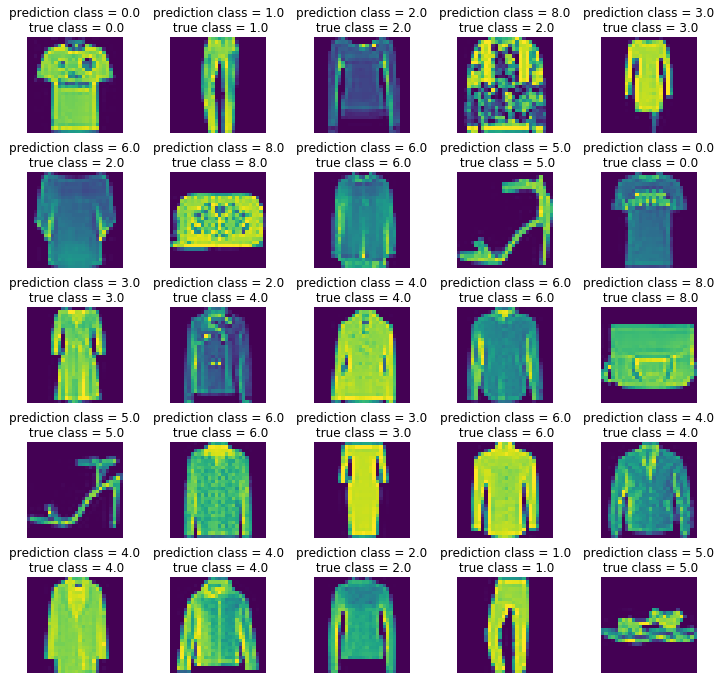

In [111]:
l = 5
w = 5
fig , axes = plt.subplots(l , w, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, l * w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("prediction class = {:0.1f}\n true class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
    plt.subplots_adjust(wspace = 0.5)

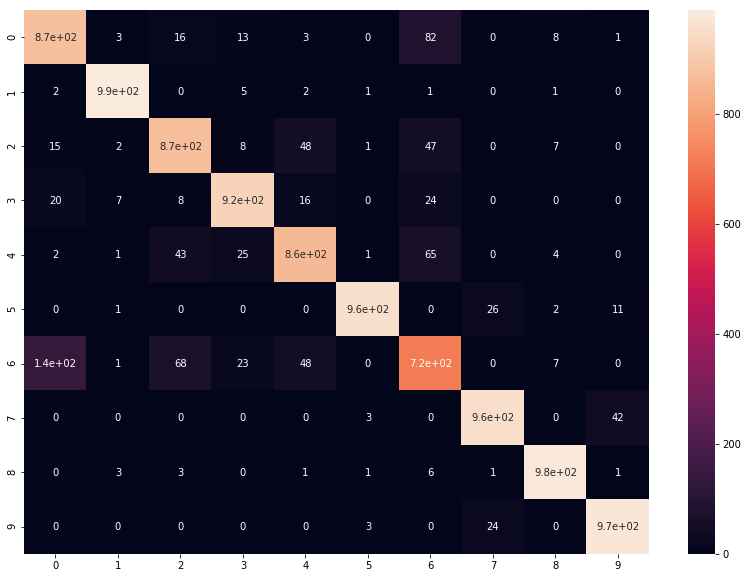

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True )

In [113]:
from sklearn.metrics import classification_report

In [114]:
num_classes = 10
target_names = ['classes {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

   classes 0       0.83      0.87      0.85      1000
   classes 1       0.98      0.99      0.99      1000
   classes 2       0.86      0.87      0.87      1000
   classes 3       0.93      0.93      0.93      1000
   classes 4       0.88      0.86      0.87      1000
   classes 5       0.99      0.96      0.97      1000
   classes 6       0.76      0.72      0.74      1000
   classes 7       0.95      0.95      0.95      1000
   classes 8       0.97      0.98      0.98      1000
   classes 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [91]:
#class 0 -> t-shirt/top
#class 1 -> trouser
#class 2 -> pullover
#class 3 -> dress
#class 4 -> coat
#class 5 -> sandal
#class 6 -> shirt
#class 7 -> sneakers 
#class 8 -> bag
#class 9 -> ankel boots